In [1]:
import numpy as np
import emcee
import matplotlib
import matplotlib.pyplot as plt
#%matplotlib inline
import pandas as pd
import corner
import corner
import time 

In [2]:
'''
MCMC fitting template. 
This template fits a 1-d gaussian, if you 
figure out how to use it for more complicated distributions
I'd appreciate if you let me know :)
banados@mpia.de
'''
np.random.seed(0)
#First let's create a gaussian data

#data = np.random.normal(loc=8, scale=.3, size=1000)
#plt.hist(data, bins = np.linspace(data.min(), data.max(), 20))
file_path = "../../../mnt/stability_stuff/stabilitydataset/data/LongTimeScale/"
planet_systems = np.loadtxt(file_path+"Order.txt", dtype = str)
print planet_systems
planet_sys = "Sys_2128_1e8.csv"
data =pd.read_csv("../../../mnt/stability_stuff/stabilitydataset/data/LongTimeScale/"+planet_sys, index_col = 0)
del data["Unnamed: 0.1"]
del data["runstring"]
data = np.log10(data["t"].values)
plt.hist(data, bins = 20)
sys_name = planet_sys.split("_")[1]




# Then, define the probability distribution that you would like to sample.
def lnprob(p, vec):
    diff = vec-p[0]
    N = len(vec)
    #probs = 
    if p[1] <=0:
        return -np.inf#0
    try:
        #probs =  -0.5 * N * np.log(2. * np.pi) - N * np.log(np.abs(p[1])) - 0.5 \
        #                            * np.sum(( (vec - p[0]) / p[1] ) ** 2)
        
        probs = -0.5 * N * np.log(2. * np.pi) - N/2. * np.log(np.abs(p[1])**2) - 0.5 \
                                    * np.sum(( (vec - p[0]) / p[1] ) ** 2)
        
    except:
        probs = 0.00
        #int probs, "NANS"
        #return probs
        
    #rint probs
    return probs
    
    
def log_prob_normed(mu, sigma, info):
    prob = -np.log(2*np.pi)/2. - np.log(sigma**2.)/2.-(1./(sigma**2.)/2./info.shape[0])*np.nansum((info-mu)**2.)
    #print 
    return prob

                                      

print planet_systems.shape

['Sys_10518_1e8.csv' 'Sys_1174_1e8.csv' 'Sys_12073_1e8.csv'
 'Sys_12840_1e8.csv' 'Sys_13362_1e8.csv' 'Sys_15003_1e8.csv'
 'Sys_15220_1e8.csv' 'Sys_16588_1e8.csv' 'Sys_17641_1e8.csv'
 'Sys_18539_1e8.csv' 'Sys_18651_1e8.csv' 'Sys_19197_1e8.csv'
 'Sys_19591_1e8.csv' 'Sys_19898_1e8.csv' 'Sys_20041_1e8.csv'
 'Sys_2008_1e8.csv' 'Sys_2010_1e8.csv' 'Sys_20620_1e8.csv'
 'Sys_20972_1e8.csv' 'Sys_2105_1e8.csv' 'Sys_2128_1e8.csv'
 'Sys_21872_1e8.csv' 'Sys_22032_1e8.csv' 'Sys_22_1e8.csv'
 'Sys_22998_1e8.csv' 'Sys_23005_1e8.csv' 'Sys_23975_1e8.csv'
 'Sys_24008_1e8.csv' 'Sys_24013_1e8.csv' 'Sys_24017_1e8.csv'
 'Sys_24248_1e8.csv' 'Sys_24346_1e8.csv' 'Sys_24453_1e8.csv'
 'Sys_24576_1e8.csv' 'Sys_24631_1e8.csv' 'Sys_24705_1e8.csv'
 'Sys_24763_1e8.csv' 'Sys_24824_1e8.csv' 'Sys_24930_1e8.csv'
 'Sys_2612_1e8.csv' 'Sys_3000_1e8.csv' 'Sys_3898_1e8.csv' 'Sys_42_1e8.csv'
 'Sys_4641_1e8.csv' 'Sys_4753_1e8.csv' 'Sys_5505_1e8.csv'
 'Sys_5958_1e8.csv' 'Sys_67_1e8.csv' 'Sys_7341_1e8.csv' 'Sys_7431_1e8.csv'
 'Sys_8

In [3]:
nwalkers = 20
ndim = 2
iterations = 1000

planet_systems=["Sys_67_1e8.csv", "Sys_3898_1e8.csv", "Sys_24930_1e8.csv", "Sys_8744_1e8.csv", "Sys_4641_1e8.csv"]

In [4]:
info = pd.read_csv("../Figures/MCMCFigures/ProbabilityTable_Fixed.csv", index_col = 0)
info.head()

,ID,Probability,Mean,Sigma,Mean_Error,Sigma_Error
0,10518,0.000075,6.463341,0.429280,0.013784,0.009556
1,1174,0.000134,5.259453,0.238805,0.007750,0.005260
2,12073,0.000061,4.521237,0.523978,0.016515,0.011698
3,12840,0.000048,4.705938,0.611376,0.019665,0.013807
4,13362,0.000065,2.085203,0.382739,0.012477,0.008768


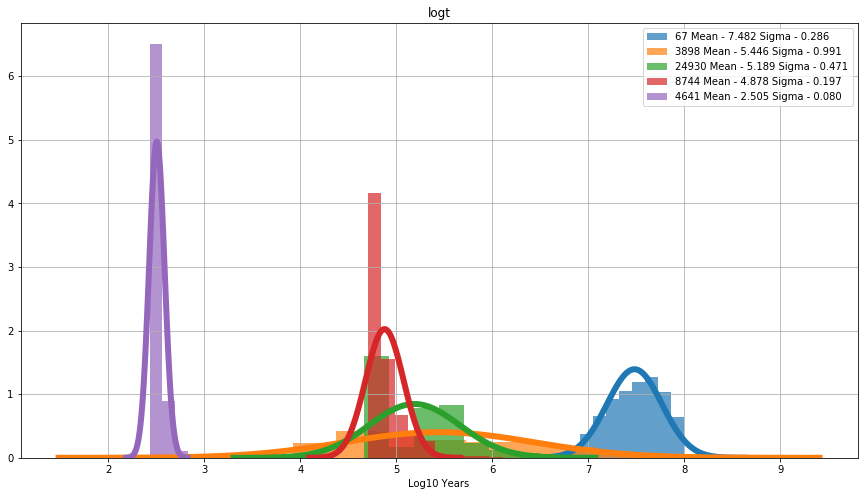

In [8]:
fig = plt.figure(figsize = (15, 8))
ax = fig.add_subplot("111")
from scipy.stats import norm

for jj , planet_sys in enumerate(planet_systems):
    data =pd.read_csv("../../../mnt/stability_stuff/stabilitydataset/data/LongTimeScale/"+planet_sys, index_col = 0)
    #print planet_sys, data.shape
    del data["Unnamed: 0.1"]
    del data["runstring"]
    data = data[data["t"]<1e8]
    data["logt"] = np.log10(data["t"])
    name = planet_sys.split("_")[1]
    # make guassian
    mean, sigma =  info[info["ID"]==int(name)][["Mean", "Sigma"]].values[0]
    x = np.linspace(mean - sigma*4, mean+sigma*4, 100)
    rv = norm(loc = mean, scale = sigma)
    graph = plt.plot(x, rv.pdf(x), linewidth = 6)
    color = graph[-1].get_color()
   
    graph = data.hist("logt", ax = ax,  label = name + " Mean - " +str("{0:.3f}".format(mean)) + " Sigma - "+ str("{0:.3f}".format(sigma)), alpha = 0.7, normed = 1,color = color)

ax.legend(loc=1)
ax.set_xlabel("Log10 Years")
plt.show()
#fig.savefig("../Figures/MCMCFigures/OverLaidHists.png", bbox_extent = "tight")


In [11]:
def plot_hists( planet_systems,title=None):
    #try making more coherent plots
    ncol, nrow = 3,len(planet_systems)//3 +1
    fig, axarr = plt.subplots(ncols=ncol,nrows=nrow)
    fig.set_size_inches((15, nrow*3))
    #axarr[0].histogram
    for jj , planet_sys in enumerate(planet_systems[:ncol*nrow]):
        data =pd.read_csv("../../../mnt/stability_stuff/stabilitydataset/data/LongTimeScale/"+planet_sys, index_col = 0)
        #print planet_sys, data.shape

        data = data[data["t"]<1e8]
        data["logt"] = np.log10(data["t"])
        name = planet_sys.split("_")[1]
        # make guassian
        mean, sigma =  info[info["ID"]==int(name)][["Mean", "Sigma"]].values[0]

        x = np.linspace(mean - sigma*4, mean+sigma*4, 100)
        rv = norm(loc = mean, scale = sigma)
        axarr[jj//ncol, jj%ncol ].plot(x, rv.pdf(x), linewidth = 4, color = "black")
        #color = graph[-1].get_color()
        data.hist("logt",  ax = axarr[jj//ncol, jj%ncol],  label = name + " Mean - " +str("{0:.3f}".format(mean)) + " Sigma - "+ str("{0:.3f}".format(sigma)), alpha = 0.7, normed = 1, color = "purple", edgecolor = "black", bins = 20)
        #create gaussian on top 
        axarr[jj//ncol, jj%ncol ].set_title(name + r': $\mu$=' +str("{0:.3f}".format(mean)) + r': $\sigma$='+ str("{0:.3f}".format(sigma)))
    plt.show()
    if title == None:
        plt.close(fig)
    else:
        fig.savefig("../Figures/MCMCFigures/"+title, bbox_extent = "tight")
    #plt.close(fig)

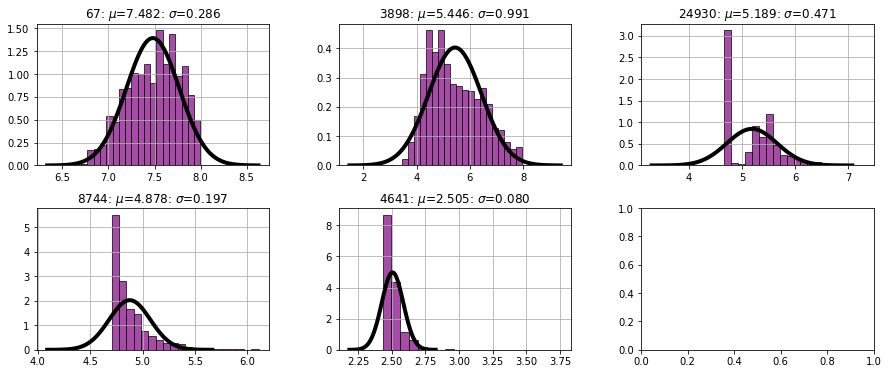

In [13]:
plot_hists( planet_systems,title="Individual_5_hists.png")
#plot_hists(planet_systems)

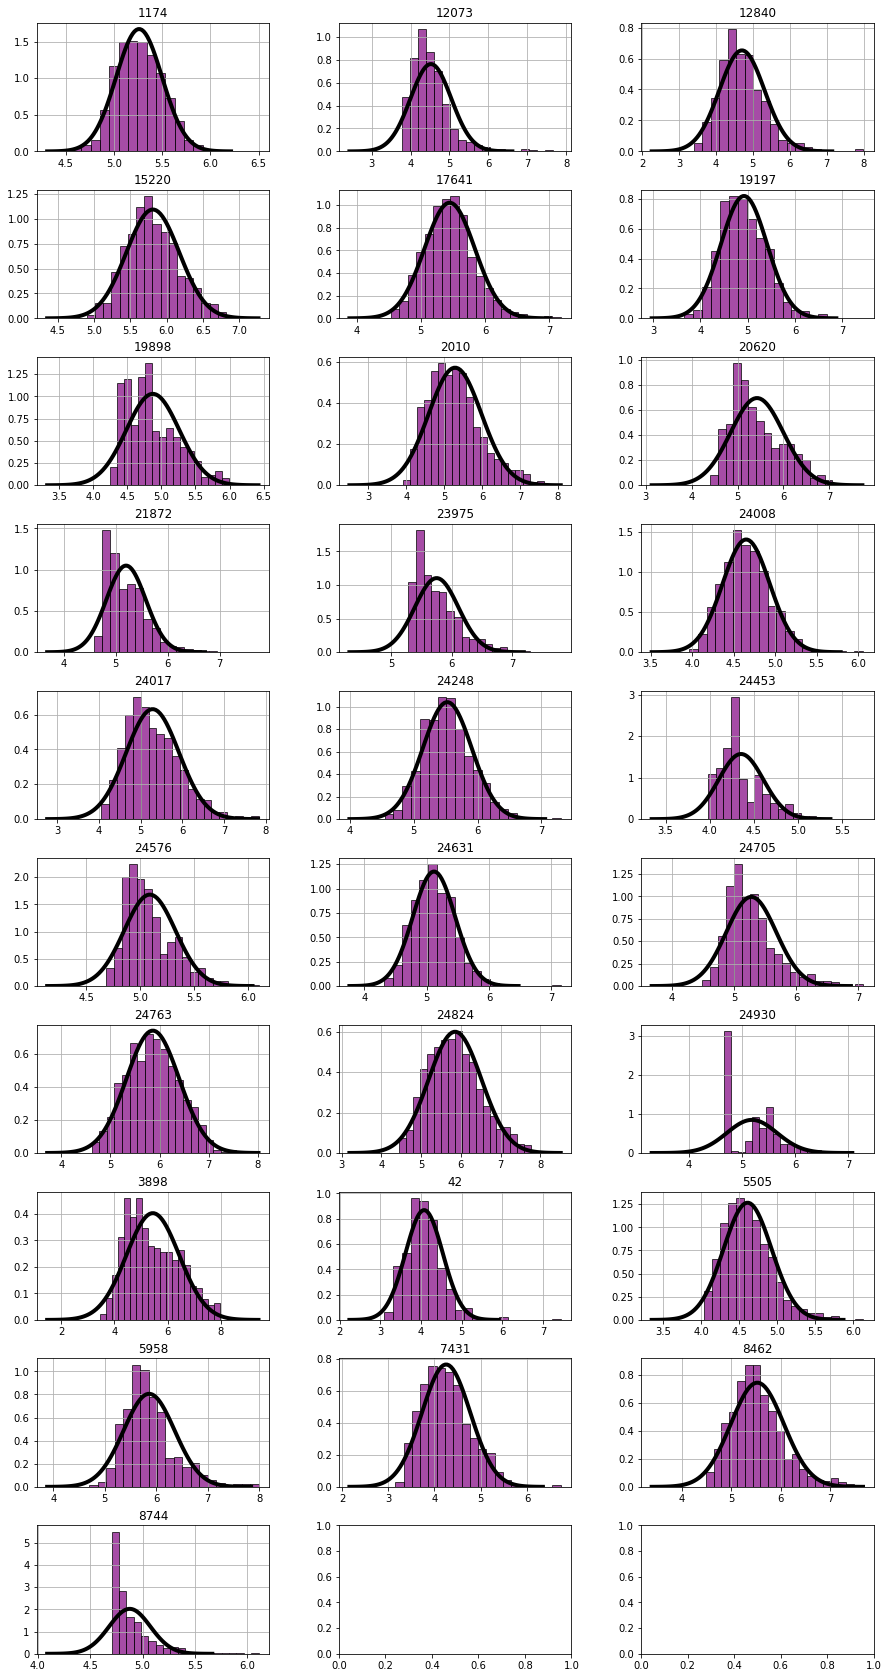

In [15]:
#try with systems in the middle to see if they are any more gaussian
good_data = info[(info["Mean"]<6) * (info["Mean"]>4)]
good_data_ids = good_data["ID"].values.astype(str)
planet_systems = ["Sys_"+x+"_1e8.csv" for x in good_data_ids]
plot_hists( planet_systems,title="Individual_Hists.png")


10


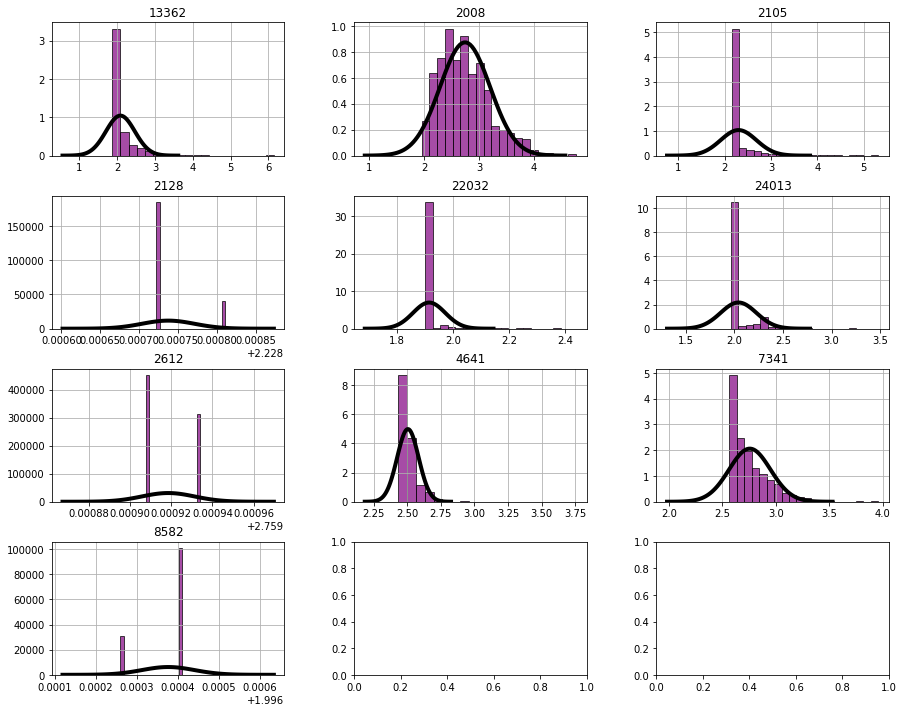

In [16]:
#look at systems on smaller time scales
short_data = info[(info["Mean"]<4)]# * (info["Mean"]>4)]
short_data_ids = short_data["ID"].values.astype(str)
#good_data_ids
planet_systems = ["Sys_"+x+"_1e8.csv" for x in short_data_ids]
print  len(planet_systems)
plot_hists( planet_systems,title="Individual_Short_Hists.png")


In [17]:
"{0:.4f}".format(31214.41)


'31214.4100'

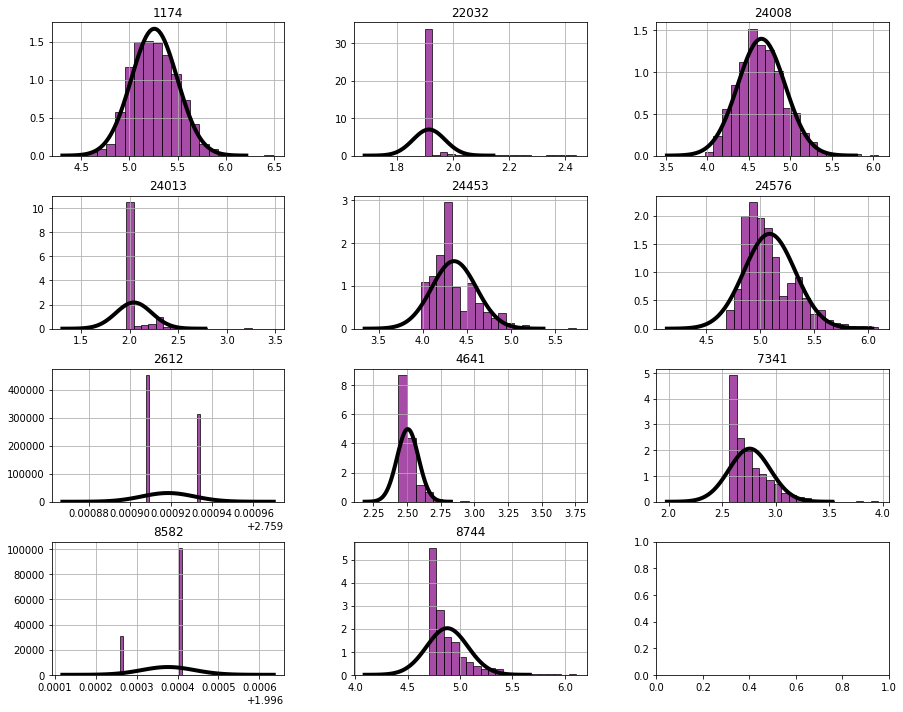

In [18]:
good_data = info[(info["Sigma_Error"]<1e-2) * (info["Mean_Error"]<1e-2)]
good_data_ids = good_data["ID"].values.astype(str)
#good_data_ids
planet_systems = ["Sys_"+x+"_1e8.csv" for x in good_data_ids]
planet_systems, len(planet_systems)
plot_hists(planet_systems, "LowErrorHist.png")

24


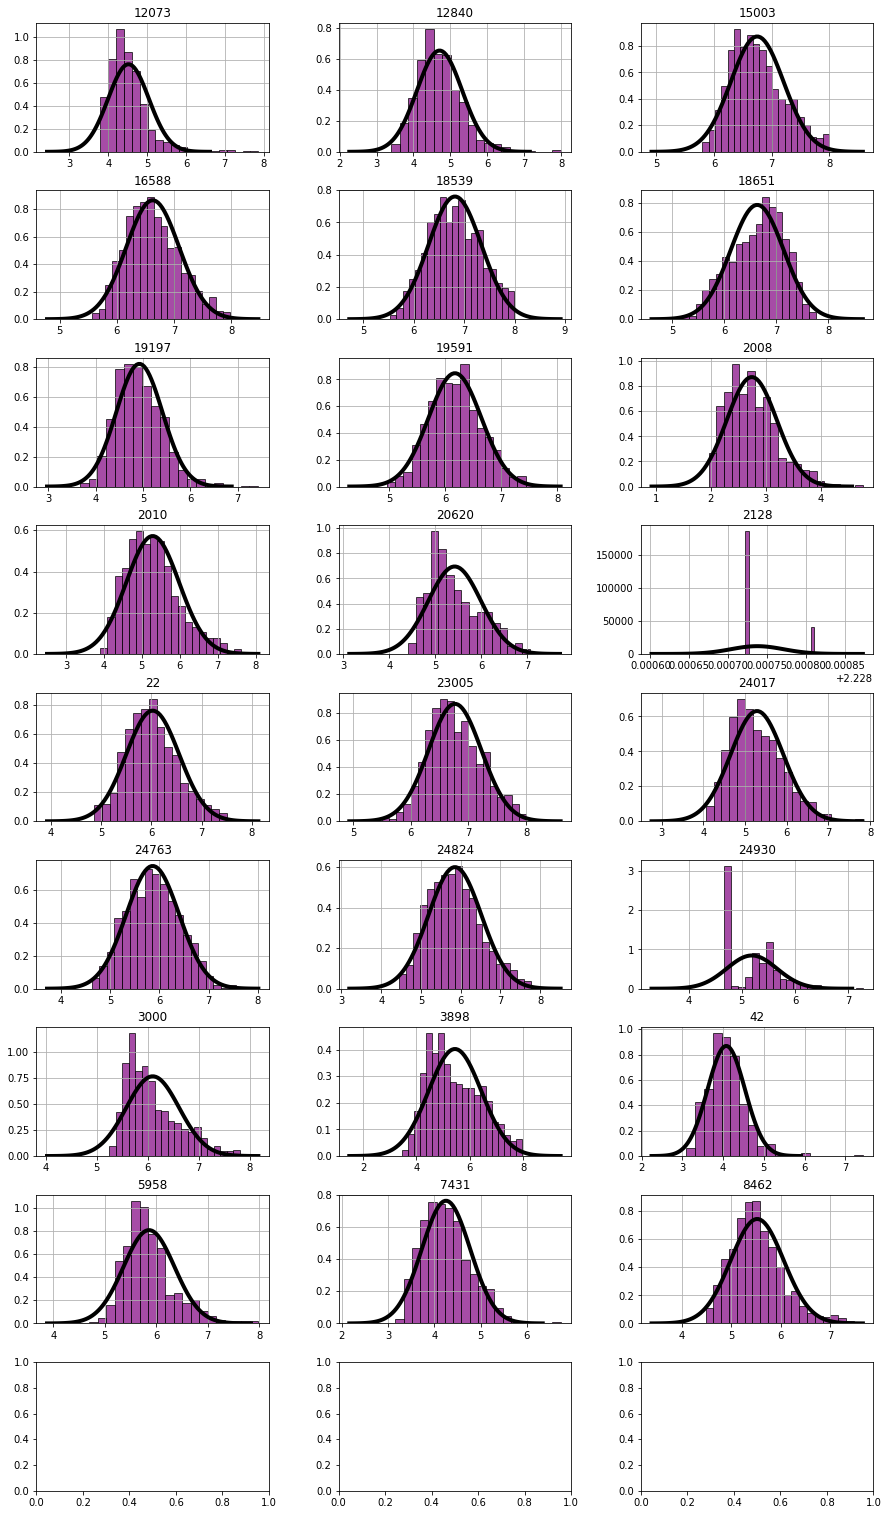

In [19]:
good_data = info[(info["Sigma_Error"]>1e-2) * (info["Mean_Error"]>1e-2)]
good_data_ids = good_data["ID"].values.astype(str)
#good_data_ids
planet_systems = ["Sys_"+x+"_1e8.csv" for x in good_data_ids]
print len(planet_systems)
plot_hists(planet_systems, "HighErrorHists.png")
 
